# Get initial data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Remove duplicates

In [3]:
# remove lines that have all values duplicated
red_wine.drop_duplicates(inplace=True, ignore_index=True)
white_wine.drop_duplicates(inplace=True, ignore_index=True)

# Add missing information and combine data

In [4]:
# add quality_label column
for wine_type in [red_wine, white_wine]:
    # we are creating a new column called "quality_label", we define a range and associate that range with a label
    wine_type['quality_label'] = wine_type['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
    wine_type['quality_label'] = pd.Categorical(wine_type['quality_label'],
    categories=['low', 'medium', 'high'])

In [5]:
# create a df with all wines

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

In [6]:
# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words
wine.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
wine.columns = wine.columns.str.replace(' ', '_')       # replace space with underscore in column names

# Define needed functions (data splitting, model training and evaluating)

In [7]:
# split the data into features (X) and target variable (y)

def split_wine_data(wine_data_ml):
    X = wine_data_ml.drop(['quality_label'], axis=1) # features
    y = wine_data_ml['quality_label']  # target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    return X_train, X_test, y_train, y_test

In [8]:
def evaluate_model(model_name, X_train, X_test, y_train, y_test):
# just runs a model and outputs it's evaluation metrics

    try: # if there is no errors
        model = model_name()
        model.fit(X_train, y_train.ravel())

        # make predictions on the test set
        y_pred = model.predict(X_test)

        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
    except: # if there are errors, return 0 for evaluation
        accuracy = 0
        conf_matrix = 0
        classification_rep = 0
    
    return accuracy, conf_matrix, classification_rep

In [9]:
def evaluate_model_short(model_name, X_train, X_test, y_train, y_test):
# just runs a model and outputs it's evaluation metrics

    try: # if there is no errors
        model = model_name(random_state = 0)
        model.fit(X_train, y_train.ravel())

        # make predictions on the test set
        y_pred = model.predict(X_test)

        # evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
    except: # if there are errors, return 0 for evaluation
        accuracy = 0
    
    return accuracy

In [10]:
# check metrics for multiple models
models = [LogisticRegression, LinearRegression, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,
          SVC, GaussianNB, LinearDiscriminantAnalysis, AdaBoostClassifier]

def get_accuracy_for_models(models, wine_data_ml):

    X_train, X_test, y_train, y_test = split_wine_data(wine_data_ml)

    evaluation_results = []

    for model in models:
        accuracy = evaluate_model_short(model, X_train, X_test, y_train, y_test)

        # make the model name more readabkle in output
        evaluation_results.append([str(model).split('.')[-1].strip("'>"), accuracy])


    # convert evaluation metrics to df
    evaluation_results = pd.DataFrame(evaluation_results, columns=['model', 'accuracy'])

    # show the evaluation metrics ordered by accuracy
    return evaluation_results.sort_values('accuracy', ascending=False)

# White Wine

### Prepare data for model cleaning

In [11]:
# prepare wine data for model training

# drop color and quality column
white_wine_ml = white_wine.drop(['color', 'quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
white_wine_ml['quality_label'].replace(quality_codes, inplace=True)

white_wine_ml

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


### Get minimum accuracy

In [12]:
# check at which point a machine learning model is actually better than just picking the most common value in the target variable
# if the model doesn't get 0.625347 accuracy, we are better off just saying everything is medium quality (1)

white_wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.625347
0    0.340318
2    0.034335
Name: proportion, dtype: float64

### Get accuracy for all models

In [13]:
get_accuracy_for_models(models, white_wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.731400
0,LogisticRegression,0.664565
8,AdaBoostClassifier,0.663304
2,DecisionTreeClassifier,0.633039
5,SVC,0.619168
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Red Wine

### Prepare data for model cleaning

In [14]:
# prepare wine data for model training

# drop color and quality column
red_wine_ml = red_wine.drop(['color', 'quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
red_wine_ml['quality_label'].replace(quality_codes, inplace=True)

red_wine_ml

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### Get minimum accuracy

In [15]:
red_wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.516556
0    0.470935
2    0.012509
Name: proportion, dtype: float64

### Get accuracy for all models

In [16]:
get_accuracy_for_models(models, red_wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.735294
8,AdaBoostClassifier,0.709559
0,LogisticRegression,0.683824
2,DecisionTreeClassifier,0.617647
5,SVC,0.617647
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Wine Combined

### Prepare data for model cleaning

In [17]:
# prepare wine data for model training

# drop color and quality column
wine_ml = wine.drop(['quality'], axis=1)

# replace the quality labels with numerical values
quality_codes = {'low' : 1, 'medium' : 2, 'high' : 0}
wine_ml['quality_label'].replace(quality_codes, inplace=True)

In [18]:
# One Hot Encoding for colors
# create an instance of OneHotEncoder
oh_enc = OneHotEncoder(categories=[['red','white']])

# fit and transform the 'color' column
encoded_color = oh_enc.fit_transform(wine_ml[['color']])

# convert the one-hot encoded data to a DataFrame
encoded_color_df = pd.DataFrame(encoded_color.toarray(), columns=oh_enc.get_feature_names_out(['color']))

# concatenate the one-hot encoded DataFrame with 'wine_ml'
wine_ml = pd.concat([wine_ml, encoded_color_df], axis=1)

# drop the original 'color' column from 'wine_ml'
wine_ml = wine_ml.drop('color', axis=1)

wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2,0.0,1.0


### Get minimum accuracy

In [19]:
wine_ml['quality_label'].value_counts(normalize=True)

quality_label
2    0.597556
1    0.373684
0    0.028759
Name: proportion, dtype: float64

### Get accuracy for all models

In [20]:
get_accuracy_for_models(models, wine_ml)

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,accuracy
3,RandomForestClassifier,0.761278
0,LogisticRegression,0.701128
8,AdaBoostClassifier,0.678571
2,DecisionTreeClassifier,0.645677
5,SVC,0.606203
1,LinearRegression,0.000000
4,KNeighborsClassifier,0.000000
6,GaussianNB,0.000000
7,LinearDiscriminantAnalysis,0.000000


# Compare Combined vs. Red vs. White Wine

In [21]:
df_list = []

for w in [wine_ml, red_wine_ml, white_wine_ml]:
    df_list.append(get_accuracy_for_models(models, w))

#concatenated_df = pd.concat(scores, axis=1, keys=['all', 'red', 'white'])
concatenated_df = pd.concat([df.set_index('model') for df in df_list], keys=['all', 'red', 'white'], axis=1)

concatenated_df

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

,all,red,white
,accuracy,accuracy,accuracy
model,,,
RandomForestClassifier,0.761278,0.735294,0.731400
LogisticRegression,0.701128,0.683824,0.664565
AdaBoostClassifier,0.678571,0.709559,0.663304
DecisionTreeClassifier,0.645677,0.617647,0.633039
SVC,0.606203,0.617647,0.619168
LinearRegression,0.000000,0.000000,0.000000
KNeighborsClassifier,0.000000,0.000000,0.000000
GaussianNB,0.000000,0.000000,0.000000


# Bonus: run RandomForestClassifier for full report, etc.

In [22]:
X_train, X_test, y_train, y_test = split_wine_data(wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7209
Confusion Matrix:
 [[  2   1  29]
 [  0 272 115]
 [  0 152 493]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.12        32
           1       0.64      0.70      0.67       387
           2       0.77      0.76      0.77       645

    accuracy                           0.72      1064
   macro avg       0.80      0.51      0.52      1064
weighted avg       0.73      0.72      0.71      1064



In [23]:
X_train, X_test, y_train, y_test = split_wine_data(red_wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7390
Confusion Matrix:
 [[ 95  29   0]
 [ 40 106   0]
 [  0   2   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       124
           1       0.77      0.73      0.75       146
           2       0.00      0.00      0.00         2

    accuracy                           0.74       272
   macro avg       0.49      0.50      0.49       272
weighted avg       0.74      0.74      0.74       272



/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [24]:
X_train, X_test, y_train, y_test = split_wine_data(white_wine_ml)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7264
Confusion Matrix:
 [[188  90   0]
 [102 388   2]
 [  1  22   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66       278
           1       0.78      0.79      0.78       492
           2       0.00      0.00      0.00        23

    accuracy                           0.73       793
   macro avg       0.47      0.49      0.48       793
weighted avg       0.71      0.73      0.72       793



# Include feature engineering

### Make correlation matrix

In [25]:
wine_ml

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2,1.0,0.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,2,0.0,1.0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0.0,1.0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,2,0.0,1.0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,2,0.0,1.0


In [26]:
wine_ml['quality_label'].value_counts()

quality_label
2    3179
1    1988
0     153
Name: count, dtype: int64

In [27]:
wine_corr = wine_ml.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality_label,color_red,color_white
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.033533,0.486253,-0.486253
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.211626,0.645335,-0.645335
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.059817,-0.183759,0.183759
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.035080,-0.328695,0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.117304,0.499517,-0.499517
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.023017,-0.465326,0.465326
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.039732,-0.694229,0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.166917,0.429377,-0.429377
ph,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.020552,0.310919,-0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.042461,0.490364,-0.490364


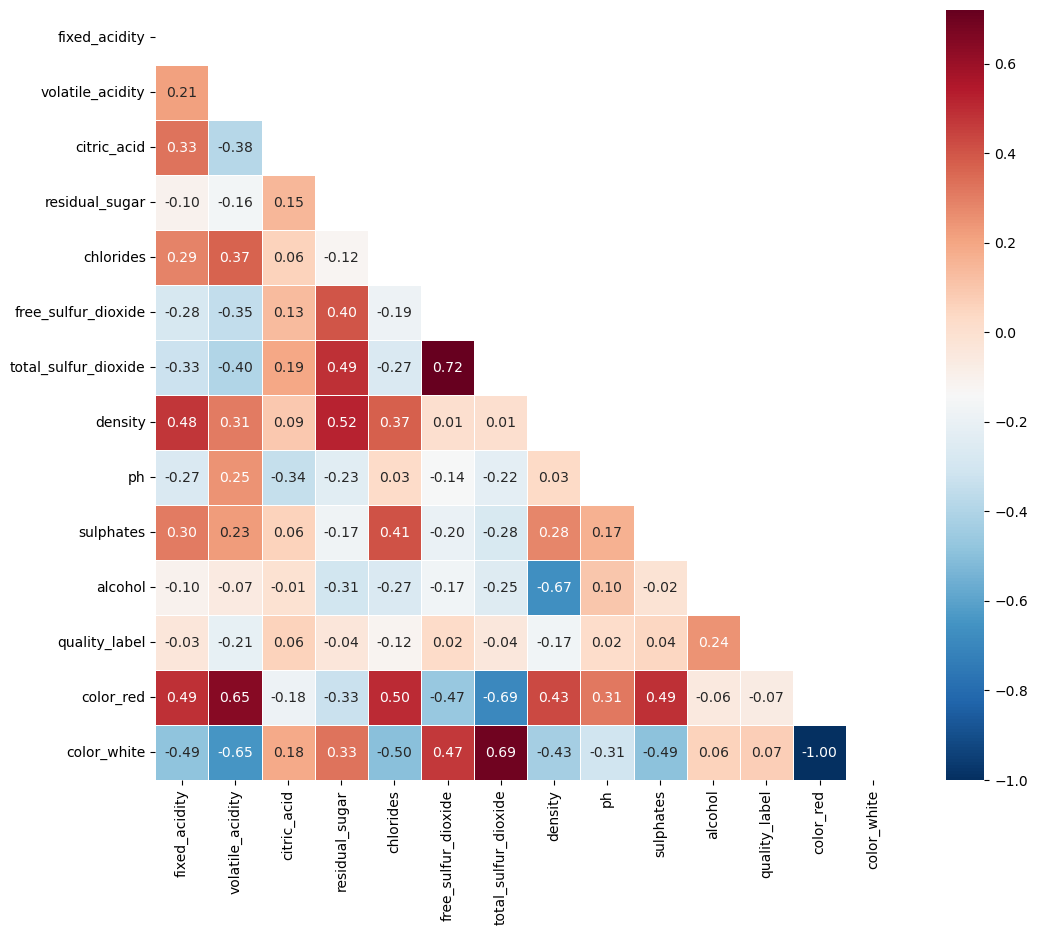

In [28]:
plt.figure(figsize=(12,10))
mask = np.triu(wine_corr)
sns.heatmap(wine_corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5, mask=mask)
plt.show()

### Iterate over the matrix

In [29]:
for feature, value in wine_corr['quality_label'].sort_values().items():
    print(feature, value)

volatile_acidity -0.2116255353471663
density -0.1669171714237715
chlorides -0.11730445146743172
color_red -0.06892530105277249
total_sulfur_dioxide -0.039732429841038516
residual_sugar -0.03508009092780351
fixed_acidity -0.03353261730031707
ph 0.020552151981071416
free_sulfur_dioxide 0.023017028996690517
sulphates 0.042461126677820704
citric_acid 0.05981741281261146
color_white 0.06892530105277245
alcohol 0.24350628016047485
quality_label 1.0


In [30]:
df_list = []

for w in [wine_ml, red_wine_ml, white_wine_ml]:
    df_list.append(get_accuracy_for_models(models, w))

#concatenated_df = pd.concat(scores, axis=1, keys=['all', 'red', 'white'])
concatenated_df = pd.concat([df.set_index('model') for df in df_list], keys=['all', 'red', 'white'], axis=1)

concatenated_df

/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michalpasternak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

,all,red,white
,accuracy,accuracy,accuracy
model,,,
RandomForestClassifier,0.761278,0.735294,0.731400
LogisticRegression,0.701128,0.683824,0.664565
AdaBoostClassifier,0.678571,0.709559,0.663304
DecisionTreeClassifier,0.645677,0.617647,0.633039
SVC,0.606203,0.617647,0.619168
LinearRegression,0.000000,0.000000,0.000000
KNeighborsClassifier,0.000000,0.000000,0.000000
GaussianNB,0.000000,0.000000,0.000000


In [31]:
models_short = [DecisionTreeClassifier, RandomForestClassifier,
          SVC, AdaBoostClassifier]

def remove_single_features(models, wine_ml):

    wine_corr = wine_ml.corr()
    df_list = []

    # get baseline
    base_score = get_accuracy_for_models(models_short, wine_ml)

    # adjust column name
    base_score.rename(columns={'accuracy' : 'base'}, inplace=True)

    # append to list
    df_list.append(base_score)

    # iterate over features, starting from least correlated
    for feature, value in wine_corr['quality_label'].sort_values().drop('quality_label').items():
        
        # remove the feature
        wine_ml_reduced = wine_ml.drop(feature, axis=1)

        # get accuracy scores
        scores = get_accuracy_for_models(models, wine_ml_reduced)

        # adjust column name
        scores.rename(columns={'accuracy' : feature}, inplace=True)

        # append to list
        df_list.append(scores)

    concatenated_df = pd.concat([df.set_index('model') for df in df_list], axis=1)

    return concatenated_df.T

In [32]:
#remove_single_features(models_short, wine_ml)

In [33]:
#remove_single_features(models_short, white_wine_ml)

In [34]:
#remove_single_features(models_short, red_wine_ml)

In [35]:
def remove_single_features_aggregated(models, wine_ml):

    wine_corr = wine_ml.corr()
    df_list = []
    wine_ml_reduced = wine_ml

    # get baseline
    base_score = get_accuracy_for_models(models_short, wine_ml)

    # adjust column name
    base_score.rename(columns={'accuracy' : 'base'}, inplace=True)

    # append to list
    df_list.append(base_score)

    # iterate over features, starting from least correlated
    for feature, value in wine_corr['quality_label'].sort_values().drop('quality_label').items():
        
        # remove the feature
        wine_ml_reduced = wine_ml_reduced.drop(feature, axis=1)

        # get accuracy scores
        scores = get_accuracy_for_models(models, wine_ml_reduced)

        # adjust column name
        scores.rename(columns={'accuracy' : feature}, inplace=True)

        # append to list
        df_list.append(scores)

    concatenated_df = pd.concat([df.set_index('model') for df in df_list], axis=1)

    return concatenated_df.T

In [36]:
#remove_single_features_aggregated(models_short, wine_ml)

In [37]:
#remove_single_features_aggregated(models_short, white_wine_ml)

In [38]:
#remove_single_features_aggregated(models_short, red_wine_ml)